In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
from vpython import *
import cv2

In [2]:
%load_ext autoreload
%autoreload 2
import HEAD_RECON

In [ ]:
head = HEAD_RECON.threeD_head.read_from_file(1,5)

In [ ]:
head.center()
head.create_vpython_spheres()
head.save()

In [ ]:
plt.imshow(head.twoD_image)
plt.show()

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

ax.scatter(head.xyz[:,0], -head.xyz[:,2], -head.xyz[:,1], c=head.rgb)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [ ]:
for i in range(1,16):
    head1 = HEAD_RECON.threeD_head.read_from_file(1,5)
    head1.full_filter()
    head1.create_vpython_spheres()
    head1.save()

In [ ]:
img1,path1 = head1.get_filtered_image()

In [ ]:
head1 = HEAD_RECON.threeD_head.read_from_file(1,7)
head2 = HEAD_RECON.threeD_head.read_from_file(1,8)

In [ ]:
head1.full_filter()
head2.full_filter()

In [3]:
head1 = HEAD_RECON.threeD_head.load_from_pickle(1,2)
head2 = HEAD_RECON.threeD_head.load_from_pickle(1,3)


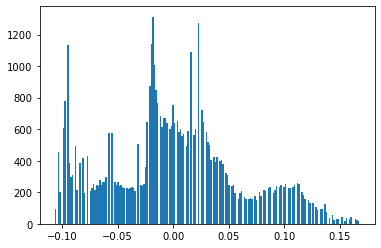

In [4]:
plt.hist(head2.xyz[:,2], bins=200)
plt.show()

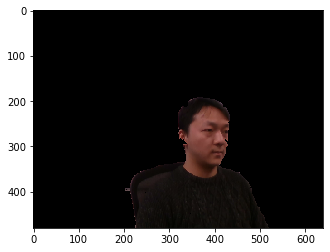

In [5]:
img1,path1 = head2.get_filtered_image()
plt.imshow(img1)

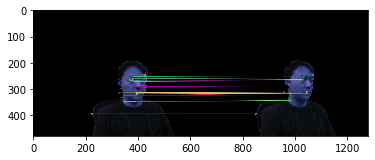

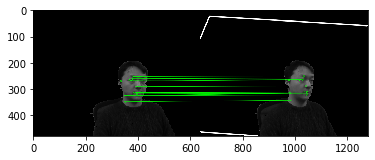

[[-0.03602169 -0.03246203  0.04105999]
 [-0.01420569 -0.17659403 -0.02294001]
 [-0.01420569 -0.17659403 -0.02294001]
 [ 0.00121931 -0.18656903 -0.02994001]
 [ 0.00303731 -0.17684403 -0.02794001]
 [ 0.00592331 -0.19943003 -0.03094001]
 [ 0.01566231 -0.10154403 -0.02994001]
 [ 0.02425631 -0.13755903 -0.03794001]
 [ 0.03317631 -0.09365603 -0.03094001]
 [ 0.03262731 -0.10217203 -0.03494001]
 [ 0.03841231 -0.08361003 -0.02794001]]
[[-0.02662096 -0.0402554   0.03256894]
 [ 0.02476304 -0.1744174  -0.02343106]
 [ 0.02476304 -0.1744174  -0.02343106]
 [ 0.04097604 -0.1855194  -0.02143106]
 [ 0.04073004 -0.1760134  -0.02343106]
 [ 0.04923704 -0.1966674  -0.01943106]
 [ 0.05404604 -0.0989064  -0.01943106]
 [ 0.06453304 -0.1361934  -0.02443106]
 [ 0.06892504 -0.0905014  -0.01643106]
 [ 0.07068504 -0.0968074  -0.01543106]
 [ 0.07260104 -0.0804354  -0.01343106]]


In [6]:
import multi_head

heads = multi_head.MultiHead.joined_heads(head1, head2)

In [7]:
print(head1.center_pos)
print(head2.center_pos)

[-4.11496785e-17 -5.63077834e-16  1.39853219e-15]
[-9.47502674e-16  2.15099286e-15  1.24568735e-14]


In [ ]:
img1,path1 = head1.get_filtered_image()
img2,path2 = head2.get_filtered_image()

In [ ]:
plt.imshow(head1.twoD_image)

In [ ]:
# test
kp1, des1 = HEAD_RECON.estimate_frame_transform.get_descriptors(path1)
kp2, des2 = HEAD_RECON.estimate_frame_transform.get_descriptors(path2)
good_without_list = HEAD_RECON.estimate_frame_transform.get_matched_points(path1,kp1,des1,path2,kp2,des2,0.8)


In [ ]:
cleaned_match = HEAD_RECON.estimate_frame_transform.clean_matches(kp1,path1,kp2,path2,good_without_list)

In [ ]:
import multi_head

heads = multi_head.MultiHead.joined_heads(head1, head2)

print(head1.center_pos)
print(head2.center_pos)

In [ ]:
%matplotlib inline

test_img= (head1.twoD_image.copy())
plt.imshow(test_img)
plt.scatter(xy1[:,0],xy1[:,1])
plt.show()


In [ ]:
%matplotlib inline
test_img= (head2.twoD_image.copy())
plt.imshow(test_img)
plt.scatter(xy2[:,0],xy2[:,1],c='g')
plt.show()


In [ ]:
from Procustes import *
A = head1.xyz_unfiltered[xyindex1][1:]
B = head2.xyz_unfiltered[xyindex2][1:]
print('----\n',A)
print('----\n',B)

c, R, t = umeyama(A, B)    
print ('c', c)
print ('R', R)
print ('t', t)

print('-------')
print('-------')
print('-------')
print(B.dot(c*R)+t)
print('-------')
print(A)

In [ ]:
d, Z, tform= procrustes(A, B, scaling=True, reflection='best')

R,c,t = tform['rotation'], tform['scale'], tform['translation']


print ("Check:  B*cR + t = A  is", np.allclose(B.dot(c*R) + t, A))
err = ((B.dot(c * R) + t - A) ** 2).sum()
print ("Residual error", err)

B.dot(c*R) + t

In [ ]:
dst_pts

In [ ]:
from Procrustes2 import *
A = np.array([
  [0, 0, -1],
  [0, 0, 0],
  [0, 0, 1],
  [0, 1, 0],
  [0, 1, 0],
  [1, 0, 0],
])

B = np.array([
  [0, 0, 1],
  [0, 0, 0],
  [0, 0, -1],
  [0, 1, 0],
  [0, 1, 0],
  [-1, 0, 0],
])

In [ ]:
d, Z, tform= procrustes(A, B, scaling=True, reflection='best')

R,c,t = tform['rotation'], tform['scale'], tform['translation']



print ("Check:  B*cR + t = A  is", np.allclose(B.dot(c*R) + t, a1))
err = ((B.dot(c * R) + t - A) ** 2).sum()
print ("Residual error", err)

In [ ]:
R

In [ ]:
from Procrustes2